In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))

['DATAA.csv']


In [2]:
data = pd.read_csv("input/DATAA.csv")
data.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [3]:
data.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06,1.781670e+06
mean,4.529689e+01,5.832552e+00,4.483359e-01,2.684813e-02,4.329092e+01,4.160401e+00,3.966314e+02,7.523509e+02,5.029296e+02,8.418491e+02,8.818314e+02,1.795506e+03,5.000182e+02,1.058688e+03,1.150938e+02,5.402591e+02,3.651805e+02,2.425358e+03,4.512572e+02,7.878615e+03
std,3.163954e+00,5.542850e-01,4.227730e-01,5.446781e-02,3.551060e+00,3.236958e+00,5.798436e+01,2.025999e+02,9.134043e+01,6.990028e+01,1.478693e+02,6.624771e+02,1.267779e+02,2.257560e+02,2.002051e+01,1.547122e+02,6.671177e+01,8.947587e+02,7.985415e+01,7.703776e+02
min,4.055000e+01,4.920000e+00,1.000000e-02,0.000000e+00,3.410000e+01,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.500000e+02,7.000000e+02,1.000000e+03,3.100000e+02,6.000000e+02,5.319314e+01,4.621887e-03,2.084052e+02,1.350838e+03,2.901073e+02,6.044110e+03
25%,4.371000e+01,5.220000e+00,3.200000e-01,0.000000e+00,4.427000e+01,1.200000e+00,3.350000e+02,5.500000e+02,4.300000e+02,7.750000e+02,7.500000e+02,1.050000e+03,3.740000e+02,9.000000e+02,1.032875e+02,4.371646e+02,3.168239e+02,1.418380e+03,3.926243e+02,7.245710e+03
50%,4.790000e+01,6.300000e+00,3.200000e-01,1.000000e-02,4.427000e+01,1.200000e+00,4.050000e+02,7.650000e+02,4.920000e+02,8.500000e+02,8.500000e+02,1.800000e+03,5.020000e+02,1.100000e+03,1.208255e+02,5.468958e+02,3.634752e+02,2.431508e+03,4.423573e+02,7.808669e+03
75%,4.790000e+01,6.300000e+00,4.000000e-01,1.000000e-02,4.516000e+01,7.500000e+00,4.400000e+02,8.500000e+02,5.750000e+02,9.000000e+02,9.540000e+02,2.340000e+03,6.300000e+02,1.300000e+03,1.311301e+02,6.566271e+02,4.120545e+02,3.160961e+03,5.034350e+02,8.521311e+03
max,5.099000e+01,6.470000e+00,1.520000e+00,1.700000e-01,4.543000e+01,8.400000e+00,4.750000e+02,1.100000e+03,6.500000e+02,9.500000e+02,1.200000e+03,3.300000e+03,6.940000e+02,1.400000e+03,1.652246e+02,7.663585e+02,5.165053e+02,4.457765e+03,7.187343e+02,1.060550e+04


In [4]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  1781670
The number of columns in dataset is -  20


In [5]:
data.isnull().sum().sort_values(ascending = True)

Carbon        0
PCC_P         0
POWER         0
CO2_P         0
H2_P          0
LNG_MF        0
CARBONAT_T    0
CAOH2         0
Water_WGS     0
GASIF_T       0
PYROL_T       0
Steam_MF      0
Air_MF        0
Ash           0
Oxygen        0
Sulfur        0
Nitrogen      0
Hydrogen      0
EXERGY        0
HHV           0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.3,random_state=40)

In [8]:
train.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06
mean,4.529733e+01,5.832477e+00,4.485157e-01,2.687818e-02,4.328886e+01,4.160498e+00,3.965679e+02,7.523562e+02,5.030080e+02,8.419233e+02,8.817711e+02,1.795123e+03,5.000024e+02,1.058673e+03,1.150914e+02,5.403179e+02,3.651554e+02,2.424840e+03,4.513143e+02,7.879042e+03
std,3.163511e+00,5.543517e-01,4.230287e-01,5.450032e-02,3.553093e+00,3.236745e+00,5.798239e+01,2.025705e+02,9.135637e+01,6.991314e+01,1.477856e+02,6.622707e+02,1.268021e+02,2.258193e+02,2.002786e+01,1.547114e+02,6.672043e+01,8.944798e+02,7.986956e+01,7.705522e+02
min,4.055000e+01,4.920000e+00,1.000000e-02,0.000000e+00,3.410000e+01,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.500000e+02,7.000000e+02,1.000000e+03,3.100000e+02,7.000000e+02,5.319314e+01,4.621887e-03,2.297005e+02,1.350838e+03,2.901073e+02,6.044110e+03
25%,4.371000e+01,5.220000e+00,3.200000e-01,0.000000e+00,4.427000e+01,1.200000e+00,3.350000e+02,5.500000e+02,4.300000e+02,7.750000e+02,7.500000e+02,1.050000e+03,3.740000e+02,9.000000e+02,1.032655e+02,4.371646e+02,3.165717e+02,1.418380e+03,3.926363e+02,7.245845e+03
50%,4.790000e+01,6.300000e+00,3.200000e-01,1.000000e-02,4.427000e+01,1.200000e+00,4.050000e+02,7.650000e+02,4.920000e+02,8.500000e+02,8.500000e+02,1.800000e+03,5.020000e+02,1.100000e+03,1.208163e+02,5.468958e+02,3.634752e+02,2.431508e+03,4.423573e+02,7.808963e+03
75%,4.790000e+01,6.300000e+00,4.000000e-01,1.000000e-02,4.516000e+01,7.500000e+00,4.400000e+02,8.500000e+02,5.750000e+02,9.000000e+02,9.540000e+02,2.340000e+03,6.300000e+02,1.300000e+03,1.311301e+02,6.566271e+02,4.120545e+02,3.160961e+03,5.035909e+02,8.522743e+03
max,5.099000e+01,6.470000e+00,1.520000e+00,1.700000e-01,4.543000e+01,8.400000e+00,4.750000e+02,1.100000e+03,6.400000e+02,9.500000e+02,1.200000e+03,3.300000e+03,6.940000e+02,1.400000e+03,1.652246e+02,7.663585e+02,5.165028e+02,4.457765e+03,7.187343e+02,1.060550e+04


In [9]:
test.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000,534501.000000
mean,45.295863,5.832727,0.447916,0.026778,43.295739,4.160175,396.779651,752.338392,502.746691,841.676060,881.972288,1796.401326,500.055276,1058.722247,115.099176,540.121731,365.239047,2426.566846,451.124091,7877.618285
std,3.164989,0.554130,0.422176,0.054392,3.546310,3.237460,57.988742,202.668839,91.303057,69.870023,148.064497,662.958240,126.721481,225.608538,20.003374,154.714175,66.691602,895.408758,79.818107,769.969856
min,40.550000,4.920000,0.010000,0.000000,34.100000,0.200000,300.000000,500.000000,370.000000,750.000000,700.000000,1000.000000,310.000000,600.000000,53.193140,0.010251,208.405241,1350.837900,290.107346,6044.110220
25%,43.710000,5.220000,0.320000,0.000000,44.270000,1.200000,335.000000,550.000000,430.000000,775.000000,750.000000,1050.000000,374.000000,900.000000,103.338706,437.164581,316.870852,1418.379790,392.028883,7245.709860
50%,47.900000,6.300000,0.320000,0.010000,44.270000,1.200000,405.000000,765.000000,492.000000,850.000000,850.000000,1800.000000,502.000000,1100.000000,120.838584,546.895824,363.475220,2431.508210,441.724126,7807.947010
75%,47.900000,6.300000,0.400000,0.010000,45.160000,7.500000,440.000000,850.000000,575.000000,900.000000,954.000000,2340.000000,630.000000,1300.000000,131.129409,656.627068,412.054523,3160.960680,503.255235,8521.311090
max,50.990000,6.470000,1.520000,0.170000,45.430000,8.400000,475.000000,1100.000000,650.000000,950.000000,1200.000000,3300.000000,694.000000,1400.000000,165.224598,766.358466,516.505312,4457.765060,718.734289,10605.502100


In [10]:
col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T"]
col_target = ["EXERGY"]

In [11]:
feature_vars = train[col_randoms ]
target_vars = train[col_target]
feature_vars.shape
target_vars.shape

(1247169, 1)

In [12]:
feature_vars.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T
count,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06,1.247169e+06
mean,4.529733e+01,5.832477e+00,4.485157e-01,2.687818e-02,4.328886e+01,4.160498e+00,3.965679e+02,7.523562e+02,5.030080e+02,8.419233e+02
std,3.163511e+00,5.543517e-01,4.230287e-01,5.450032e-02,3.553093e+00,3.236745e+00,5.798239e+01,2.025705e+02,9.135637e+01,6.991314e+01
min,4.055000e+01,4.920000e+00,1.000000e-02,0.000000e+00,3.410000e+01,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.500000e+02
25%,4.371000e+01,5.220000e+00,3.200000e-01,0.000000e+00,4.427000e+01,1.200000e+00,3.350000e+02,5.500000e+02,4.300000e+02,7.750000e+02
50%,4.790000e+01,6.300000e+00,3.200000e-01,1.000000e-02,4.427000e+01,1.200000e+00,4.050000e+02,7.650000e+02,4.920000e+02,8.500000e+02
75%,4.790000e+01,6.300000e+00,4.000000e-01,1.000000e-02,4.516000e+01,7.500000e+00,4.400000e+02,8.500000e+02,5.750000e+02,9.000000e+02
max,5.099000e+01,6.470000e+00,1.520000e+00,1.700000e-01,4.543000e+01,8.400000e+00,4.750000e+02,1.100000e+03,6.400000e+02,9.500000e+02


In [13]:
target_vars.describe()

,EXERGY
count,1.247169e+06
mean,4.513143e+02
std,7.986956e+01
min,2.901073e+02
25%,3.926363e+02
50%,4.423573e+02
75%,5.035909e+02
max,7.187343e+02


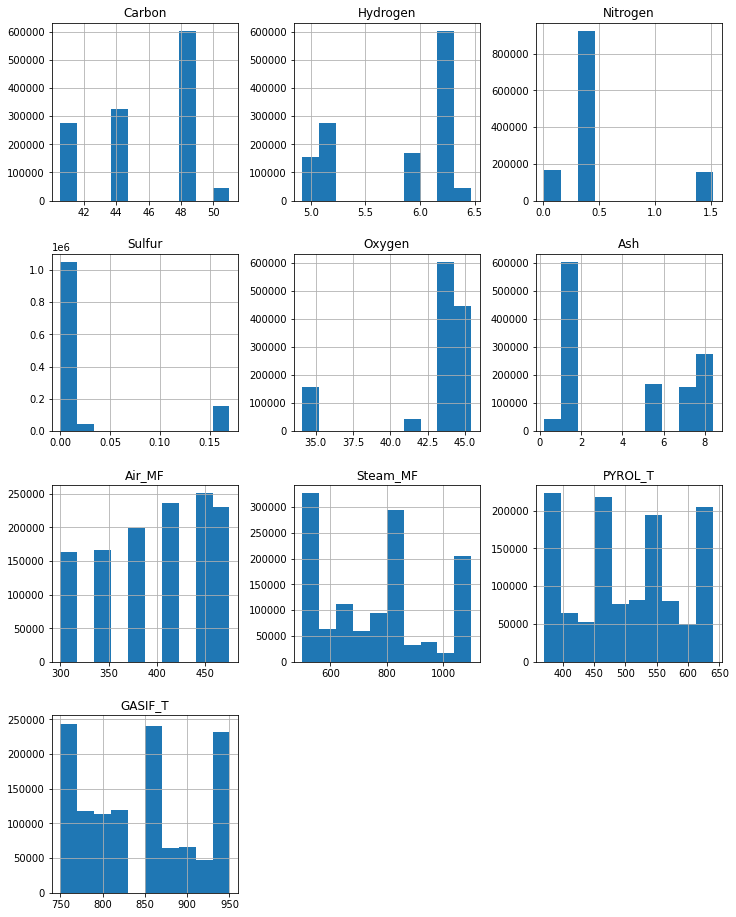

In [14]:
feature_vars.hist(bins = 10 , figsize= (12,16)) ;
plt.savefig("out.png")

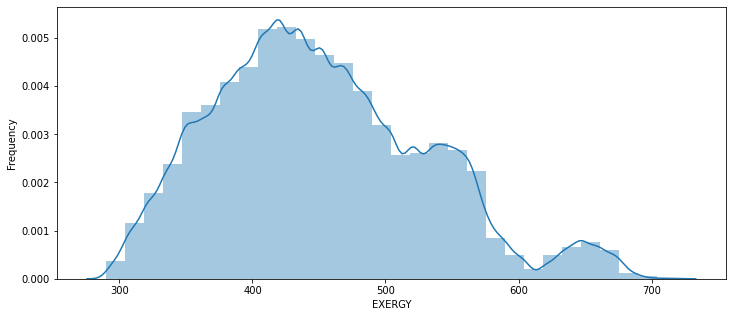

In [17]:
f = plt.figure(figsize=(12,5))
plt.xlabel('kg/hr')
plt.ylabel('Frequency')
sns.distplot(target_vars.EXERGY , bins=30 ) ;

<AxesSubplot:>

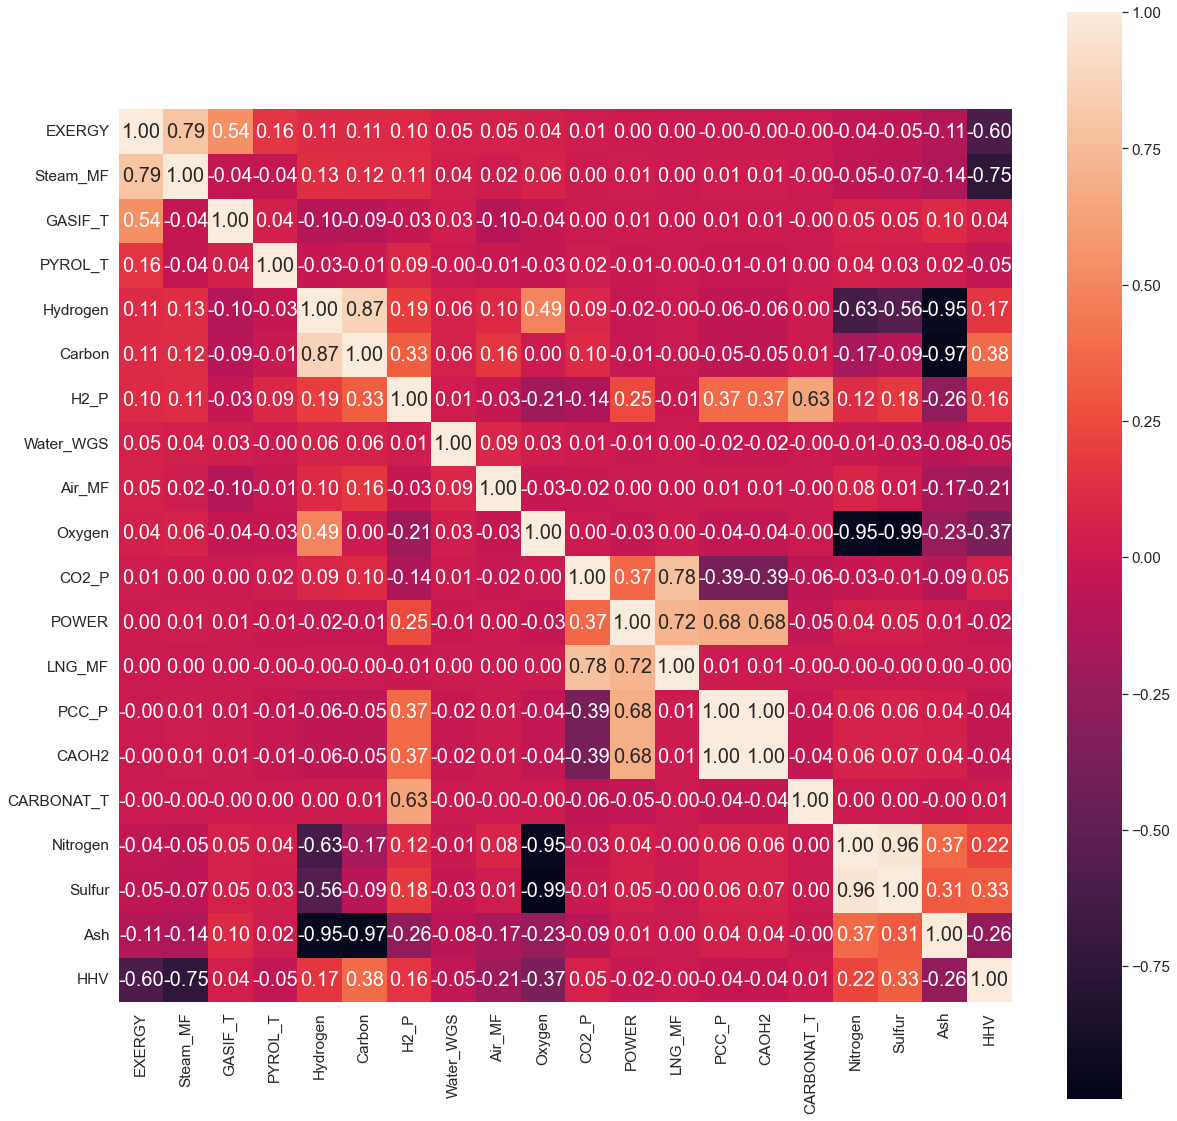

In [18]:
from matplotlib import rcParams
train_corr = train[col_randoms]
rcParams['figure.figsize'] = 20,20
corr_matrix = train.corr()
column_ind = corr_matrix.nlargest(20, 'EXERGY')['EXERGY'].index
cm = np.corrcoef(train[column_ind].values.T)
sns.set(font_scale=1.4)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=column_ind.values, xticklabels=column_ind.values)

In [19]:
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

train_X.shape

(1247169, 10)

In [20]:
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

test_X.shape

(534501, 10)

In [21]:
train_X.columns


Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T'],
      dtype='object')

In [22]:
test_X.columns

Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train = train[list(train_X.columns.values) + col_target ]
test = test[list(test_X.columns.values) + col_target ]
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

In [24]:
sc_train.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,EXERGY
1250495,-1.500652,-1.104853,-0.114686,-0.493175,0.602613,1.309805,-1.665471,1.716163,1.499535,0.115525,1.560528
976320,-1.500652,-1.104853,-0.114686,-0.493175,0.602613,1.309805,-0.458207,0.679486,-1.127541,-0.957235,-0.297090
899954,1.799480,1.150034,-0.161965,-0.126204,-0.379630,-1.223606,0.749057,-0.998943,-0.032926,-0.599649,-0.747157
656572,0.822717,0.843369,-0.303799,-0.309690,0.276137,-0.914653,1.352688,-1.245770,0.514381,-0.957235,-1.240089
155577,0.822717,0.843369,-0.303799,-0.309690,0.276137,-0.914653,0.145425,-1.245770,-1.455925,-1.314822,-1.826769


In [25]:
sc_test.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,EXERGY
1057861,-1.499490,-1.105748,-0.113499,-0.492317,0.601827,1.309616,0.745324,-0.307588,1.393748,0.119135,0.035344
336336,0.822796,0.843256,-0.302993,-0.308466,0.274726,-0.914352,-1.065374,0.235170,-1.453914,-1.312096,-0.899044
984462,-1.499490,-1.105748,-0.113499,-0.492317,0.601827,1.309616,-1.668940,-1.097054,-0.139609,0.476942,-0.939833
776128,0.822796,0.843256,-0.302993,-0.308466,0.274726,-0.914352,0.745324,0.235170,-0.468185,-1.312096,-0.602450
1716579,-0.472629,-1.647138,2.539428,2.633153,-2.593047,1.031620,1.348890,-0.011538,-0.281992,1.550365,0.892320


In [26]:
train_X =  sc_train.drop(['EXERGY'] , axis=1)

test_X =  sc_test.drop(['EXERGY'] , axis=1)

In [27]:
train_X.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T
1250495,-1.500652,-1.104853,-0.114686,-0.493175,0.602613,1.309805,-1.665471,1.716163,1.499535,0.115525
976320,-1.500652,-1.104853,-0.114686,-0.493175,0.602613,1.309805,-0.458207,0.679486,-1.127541,-0.957235
899954,1.799480,1.150034,-0.161965,-0.126204,-0.379630,-1.223606,0.749057,-0.998943,-0.032926,-0.599649
656572,0.822717,0.843369,-0.303799,-0.309690,0.276137,-0.914653,1.352688,-1.245770,0.514381,-0.957235
155577,0.822717,0.843369,-0.303799,-0.309690,0.276137,-0.914653,0.145425,-1.245770,-1.455925,-1.314822


In [28]:
train_y.head()

,EXERGY
1250495,575.952983
976320,427.585854
899954,391.639250
656572,352.269016
155577,305.411151


In [29]:
from sklearn.ensemble import ExtraTreesRegressor

In [30]:
models = [
          ['ExtraTreeRegressor :',ExtraTreesRegressor()],
         ]

In [31]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 80
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [32]:
model_data

[{'Name': 'ExtraTreeRegressor :',
  'Train_Time': 265.34485626220703,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.9999812677761424,
  'Test_RMSE_Score': 0.34545834219752564}]

In [33]:
df1 = pd.DataFrame(model_data)
df1

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,ExtraTreeRegressor :,265.344856,1.0,0.999981,0.345458


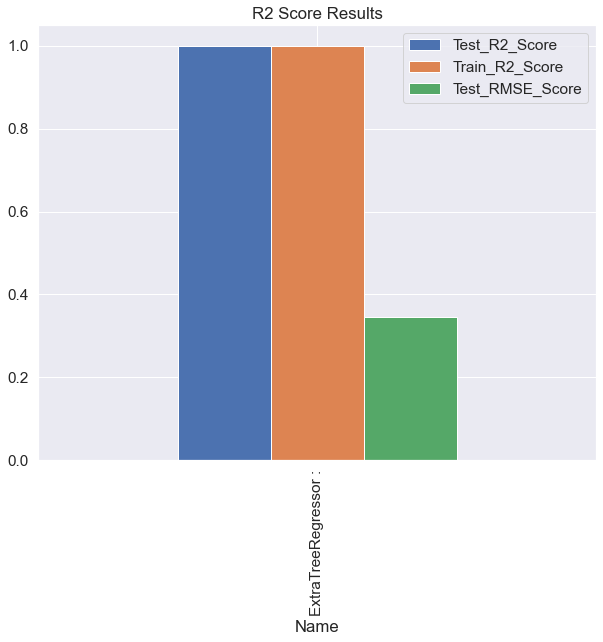

In [34]:
df1.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

In [35]:
from plotly.offline import  init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 200],
              'n_estimators' : [100,200],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 200],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 200]}],
             scoring='r2', verbose=2)

In [36]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 100}

In [37]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, random_state=40)

In [38]:
grid_search.best_estimator_.score(train_X,train_y)

1.0

In [39]:
grid_search.best_estimator_.score(test_X,test_y)

0.9999883192570816

In [40]:
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.2727949006675829

In [41]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

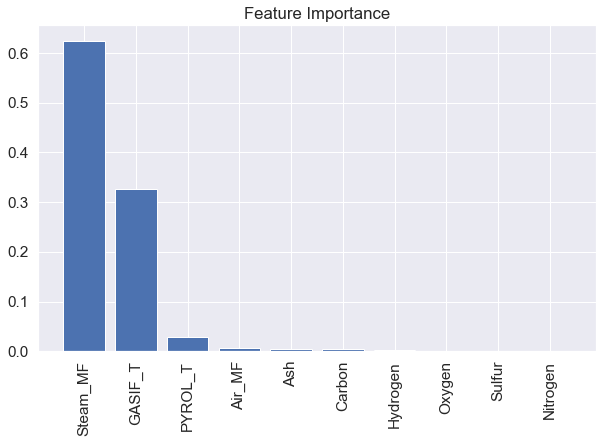

In [42]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices])
plt.xticks(range(train_X.shape[1]), names, rotation=90)
plt.show()

In [43]:
names[0:5]

['Steam_MF', 'GASIF_T', 'PYROL_T', 'Air_MF', 'Ash']

In [44]:
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [45]:
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(max_depth=80, random_state=40)

In [46]:
print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  1.0
Testing set R2 Score -  0.9999878778084832
Testing set RMSE Score -  0.2779019444829243
